# Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import visualize_tsne_model

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances

# Dimensionality reduction

## 1. t-SNE

Iteration  1  Loss =  0.16599861818053024
Iteration  2  Loss =  0.1373985181917983
Iteration  3  Loss =  0.12164968728660239
Iteration  4  Loss =  0.10857853541262538
Iteration  5  Loss =  0.09793193772794283
Iteration  6  Loss =  0.08978015558717599
Iteration  7  Loss =  0.08402205175289976
Iteration  8  Loss =  0.08024999088790122
Iteration  9  Loss =  0.0779183732595513
Iteration  10  Loss =  0.07653498599756611
Iteration  11  Loss =  0.07573435937396923
Iteration  12  Loss =  0.07527608936839032
Iteration  13  Loss =  0.07501425729419767
Iteration  14  Loss =  0.07486420030381066
Iteration  15  Loss =  0.0747777506816149
Iteration  16  Loss =  0.07472764966774112
Iteration  17  Loss =  0.07469844397868423
Iteration  18  Loss =  0.07468132776795693
Iteration  19  Loss =  0.07467124991246742
Iteration  20  Loss =  0.07466529287000452
[INFO] Output visualization gif has been written to regression_viz.gif


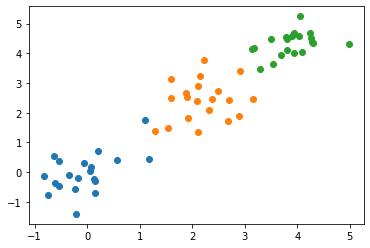

In [2]:
visualize_tsne_model(original_dim=3, new_dim=2, samples_per_class=20, perplexity=5)
plt.show()

<img src='regression_viz.gif' height=640 width=1080/>

In [3]:
perplexity=12
def conditional_p(X_i, X_j):
    if((X_i - X_j).sum() == 0) : return 0
    numerator = np.exp((-(np.linalg.norm(X_i - X_j))**2)/(2 * perplexity))
    denom = np.exp((-(X_i - X) ** 2).sum(axis=1) / (2 * perplexity))
    mask = (X != X_i).astype(int).mean(axis=1)
    denom = np.multiply(denom, mask).sum()
    return numerator/denom

def p_ij(X_i, X_j):
    return (conditional_p(X_i, X_j) + conditional_p(X_j, X_i)) / (2*len(X))

X = np.random.normal(size=(100,4))
P = pairwise_distances(X, X, metric=p_ij)
P.sum()

1.0

In [4]:
P

array([[0.00000000e+00, 9.39383173e-05, 1.18867589e-04, ...,
        1.12991701e-04, 9.80552569e-05, 1.16922686e-04],
       [9.39383173e-05, 0.00000000e+00, 8.10982844e-05, ...,
        7.80643044e-05, 9.58624167e-05, 7.74260289e-05],
       [1.18867589e-04, 8.10982844e-05, 0.00000000e+00, ...,
        1.26642555e-04, 1.12806288e-04, 1.27306383e-04],
       ...,
       [1.12991701e-04, 7.80643044e-05, 1.26642555e-04, ...,
        0.00000000e+00, 1.15980344e-04, 1.30391931e-04],
       [9.80552569e-05, 9.58624167e-05, 1.12806288e-04, ...,
        1.15980344e-04, 0.00000000e+00, 1.13932011e-04],
       [1.16922686e-04, 7.74260289e-05, 1.27306383e-04, ...,
        1.30391931e-04, 1.13932011e-04, 0.00000000e+00]])